In [1]:
from collections import namedtuple
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from module import oblique_incidence_property as oip

# ロールスクリーンの斜入射特性を計算するモジュール

## 1. Functions  

垂直入射時のロールスクリーンの日射透過率及び日射反射率から任意の入射角におけるロールスクリーンの日射透過率及び日射反射率を計算する。

### 入力値  
$ \tau_{0,f} $ ：ロールスクリーンの正面側からの入射光に対する垂直入射時の日射透過率  
$ \tau_{0,b} $ ：ロールスクリーンの背面側からの入射光に対する垂直入射時の日射透過率  
$ \rho_{0,f} $ ：ロールスクリーンの正面側からの入射光に対する垂直入射時の日射反射率  
$ \rho_{0,b} $ ：ロールスクリーンの背面側からの入射光に対する垂直入射時の日射反射率  
$ \phi$        ：日射の入射角（°）

### 出力値
$ \tau_{\phi,f} $ ：ロールスクリーンの正面側からの入射光に対する入射角$\phi$の日射透過率  
$ \tau_{\phi,b} $ ：ロールスクリーンの背面側からの入射光に対する入射角$\phi$の日射透過率  
$ \rho_{\phi,f} $ ：ロールスクリーンの正面側からの入射光に対する入射角$\phi$の日射反射率  
$ \rho_{\phi,b} $ ：ロールスクリーンの背面側からの入射光に対する入射角$\phi$の日射反射率

### 計算方法  

#### データ構造と値の範囲  

$\tau_{0,f}$・$\tau_{0,b}$・$\rho_{0,f}$の組み合わせをクラス『role＿input』と定義する。  
全ての値は0.0以上1.0以下の値をとる。  
$\tau_{0,f}$ と $\rho_{0,f}$ の合計は1.0を超えない。  
$\tau_{0,b}$ と $\rho_{0,b}$ の合計は1.0を超えない。  

#### 入射角φの日射透過率及び日射反射率の計算

入射角によって日射特性が変化しないロールスクリーンの日射透過率及び日射反射率の計算方法を以下に示す。  

$$
\begin{eqnarray}
 &\displaystyle \tau_{\phi,f} = \tau_{0,f}& \qquad\qquad\text{(1)} \nonumber\\
 \nonumber \\
 &\displaystyle \tau_{\phi,b} = \tau_{0,b}& \qquad\qquad\text{(2)} \nonumber\\
 \nonumber \\
 &\displaystyle \rho_{\phi,f} = \rho_{0,f}& \qquad\qquad\text{(3)} \nonumber\\
 \nonumber \\
 &\displaystyle \rho_{\phi,b} = \rho_{0,b}& \qquad\qquad\text{(4)} \nonumber 
\end{eqnarray}
$$

#### Example

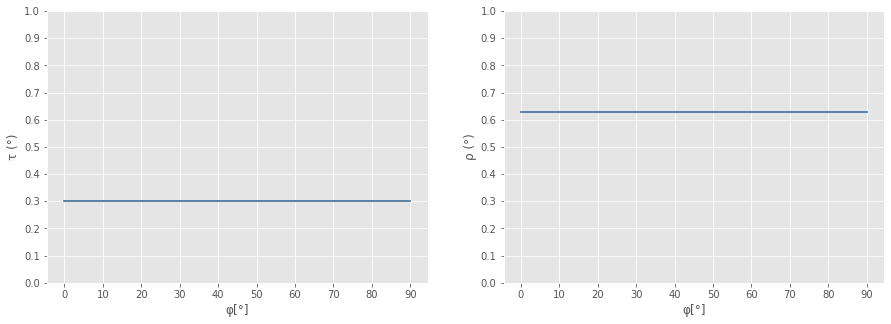

In [2]:
role_result = np.zeros((5,91))
rl_in = oip.RoleInput(0.3, 0.3, 0.63, 0.63)

for j in range(0, 91):
    phi = j
    role_result[0][j] = phi
    p = rl_in.get_ang_prop(phi)
    role_result[1][j] = p[0]
    role_result[2][j] = p[1]
    role_result[3][j] = p[2]
    role_result[4][j] = p[3]

#np.savetxt('role_result.csv', np.transpose(role_result), fmt='%.10f', delimiter=',')

#グラフの描画
graph_num = 2
ax = np.empty(graph_num, dtype = np.object)
fig = plt.figure(figsize = (15, 5 * ((graph_num + 1) // 2)))
plt.style.use('ggplot')

gpc = ['C0', 'C1']
gxd = [[role_result[0][0:91], role_result[0][0:91]], [role_result[0][0:91], role_result[0][0:91]]]
gyd = [[role_result[1][0:91], role_result[2][0:91]], [role_result[3][0:91], role_result[4][0:91]]]
gxl = 'φ[°]'
gyl = ['τ (°)', 'ρ (°)']
gxt = [10 * i for i in range(10)]
gyt = [0.1 * i for i in range(11)]

for i in range(graph_num):   
    ax[i] = fig.add_subplot((graph_num + 1) // 2, 2, i + 1)
    for j in range(2):
        ax[i].plot(gxd[i][j], gyd[i][j], color = gpc[j])
    ax[i].set_xticks(gxt)
    ax[i].set_yticks(gyt)
    ax[i].set_xlabel(gxl, fontsize = 12)
    ax[i].set_ylabel(gyl[i], fontsize = 12)

plt.show()